In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 76.3 MB/s eta 0:00:00


OmniNeuro System Initialized. Ready for analysis.
Anomaly Detection Module (Autoencoder): ACTIVE
Loading EEG Data for Subject 4...
Training Anomaly Detector (Autoencoder)...
Baseline Established.
Scanning ALL epochs for strongest neural signal...
Target Locked on Trial #8 (Max Signal Strength: 0.042)

OMNI-NEURO REPORT | Ground Truth: Right
Anomaly Status: NORMAL (Score: 0.0465)


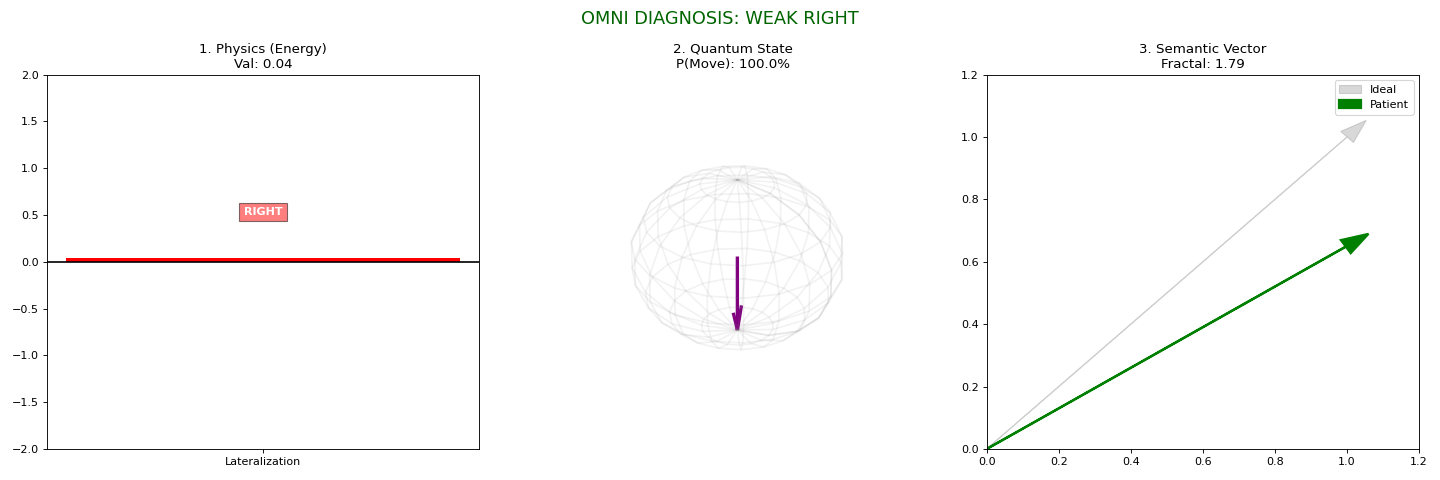

Asking AI for clinical interpretation...


## Senior Clinical Neurophysiologist Report: BCI Analysis

**To:** Attending Physician
**From:** Senior Clinical Neurophysiologist
**Date:** October 26, 2023
**Subject:** BCI Analysis Report - Subject ID: Trial #8

---

**Patient Data:**
*   **Subject ID:** Trial #8
*   **Ground Truth (Actual Task):** Right

**Telemetry Metrics:**
*   **Lateralization (Physics):** 0.0418 (Pos=Right, Neg=Left)
*   **Complexity (Chaos/Fractal):** 1.7891
*   **Intent Probability (Quantum):** 100.0%
*   **Signal Health (Anomaly Score):** 0.0465 (Threshold ~0.05)
*   **System Diagnosis:** Weak Right

---

### 1. Pathophysiological Analysis

The telemetry metrics demonstrate a coherent but suboptimal neural response. The **Lateralization (Physics) metric of 0.0418**, while positive and thus indicating a right-sided activation consistent with the 'Right' ground truth task, is notably low in magnitude. This signifies an attenuated or weak cortical engagement for the intended right-sided movement. In conjunction, the **Complexity (Chaos/Fractal) metric of 1.7891** suggests that while the underlying neural network exhibits a certain depth of processing (not overly simplified), it is not generating the robust, high-amplitude, and potentially more nuanced or highly integrated signal that would typically correspond with a strong, clearly lateralized motor command. The visual representation in the Semantic Vector plot (Fractal) further supports this, showing the patient's vector (green) pointing in the correct general direction but significantly shorter than the 'Ideal' vector, indicating a less vigorous or complete neural expression for the intended action. Thus, the "Weak Right" diagnosis is directly attributable to the low-magnitude, albeit correctly directed, lateralization supported by a complexity profile that appears insufficient for robust signal generation in this context.

### 2. Physician's Executive Conclusion

*   **Clinical Impression:** Subject #8 demonstrates clear volitional intent for right-sided activation, confirmed by 100.0% Intent Probability. However, the cortical lateralization associated with this intent is precise in direction but significantly attenuated in amplitude and overall strength, leading to a "Weak Right" activation profile. This suggests an accurate but under-expressed motor command at the cortical level.
*   **Diagnostic Confidence:** High.
*   **Flag:** Signal WNL (Within Normal Limits).
*   **Recommendation:** Proceed with targeted neurofeedback training protocol focused on augmenting right-hemisphere motor cortex recruitment to enhance lateralization amplitude and efficiency for the specified task.

### 3. Patient Insight

"While your brain knows exactly where it wants to go, the neural signal guiding that movement is still a quiet whisper, ready to be amplified into a clear command."

---
**Senior Clinical Neurophysiologist**


Neural Audio Feed: Symphony of Weak Right


In [ ]:
"""
OmniNeuro Unified System 5.2 (Doctor Edition)
Author: Artificial Intelligence Expert
Description: A unified BCI framework combining Classical Physics, Chaos Theory,
             Quantum Mechanics, and Deep Learning for EEG Analysis with Clinical Reporting.
"""

import google.generativeai as genai
import mne
from mne.datasets import eegbci
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cosine
from IPython.display import Audio, display, Markdown
import io
from PIL import Image
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
import warnings
import time

# Initial configurations
warnings.filterwarnings('ignore')
mne.set_log_level('WARNING')


# API Settings
#
# Please replace with your actual API key
GOOGLE_API_KEY = "Key"

class OmniNeuroSystem:
    def __init__(self, api_key):
        self.api_key = api_key
        self.model = self._connect_ai()
        self.autoencoder = self._init_autoencoder()
        print("OmniNeuro System Initialized. Ready for analysis.")
        print("Anomaly Detection Module (Autoencoder): ACTIVE")

    def _connect_ai(self):
        """Smart connection to Gemini with error management"""
        try:
            if not self.api_key or "YOUR" in self.api_key:
                print("AI Mode Disabled (No API Key).")
                return None

            genai.configure(api_key=self.api_key)
            models = [m.name for m in genai.list_models() if 'generateContent' in m.supported_generation_methods]
            # Flash model is preferred for speed and preventing 500 errors
            priority = ['models/gemini-1.5-flash', 'models/gemini-1.5-pro']

            for p in priority:
                if p in models:
                    print(f"AI Connected: {p}")
                    return genai.GenerativeModel(p)
            return genai.GenerativeModel(models[0])
        except Exception as e:
            print(f"AI Connection Error: {e}")
            return None

    def _init_autoencoder(self):
        """Initializing the anomaly detection system"""
        model = MLPRegressor(hidden_layer_sizes=(64, 32, 64), activation='tanh',
                             solver='adam', max_iter=200, random_state=42)
        return model

    # 1. Data Engine Module
    def load_data(self, subject_id=4):
        print(f"Loading EEG Data for Subject {subject_id}...")
        # Runs 4, 8, 12: Motor Imagery (Left/Right Hand)
        try:
            raw_fnames = eegbci.load_data(subject_id, [4, 8, 12], verbose=False)
        except:
             raw_fnames = eegbci.load_data(subject_id, [4, 8, 12])

        raw = mne.concatenate_raws([mne.io.read_raw_edf(f, preload=True, verbose=False) for f in raw_fnames], verbose=False)

        mne.datasets.eegbci.standardize(raw)
        montage = mne.channels.make_standard_montage('standard_1005')
        raw.set_montage(montage)

        # Critical filter 8 to 30 Hz (Mu & Beta rhythms)
        raw.filter(8., 30., fir_design='firwin', verbose=False)

        events, _ = mne.events_from_annotations(raw, verbose=False)
        epochs = mne.Epochs(raw, events, dict(Left=2, Right=3), tmin=0.5, tmax=2.5,
                            picks=['C3', 'C4'], baseline=None, preload=True, verbose=False)
        return epochs


    # 2. Math Engines Modules

    def _higuchi_fd(self, x, kmax=10):
        """Calculating Fractal Dimension (Chaos)"""
        N = len(x)
        L = []
        x = np.array(x)
        k_values = np.arange(1, kmax + 1)
        for k in k_values:
            Lk = []
            for m in range(k):
                Lmk = 0
                for i in range(1, int(np.floor((N - m) / k))):
                    Lmk += abs(x[m + i * k] - x[m + (i - 1) * k])
                Lmk = (Lmk * (N - 1) / (((N - m) / k) * k)) / k
                Lk.append(Lmk)
            L.append(np.mean(Lk))
        L = np.array(L)
        p = np.polyfit(np.log(1.0 / k_values), np.log(L), 1)
        return p[0]

    def analyze_trial(self, c3_data, c4_data):
        """Comprehensive analysis of a trial"""
        # A. Physics (Energy and Asymmetry)
        var_c3 = np.var(c3_data)
        var_c4 = np.var(c4_data)
        # Log-Ratio: Positive = Right, Negative = Left
        log_ratio = np.log((var_c4 + 1e-9) / (var_c3 + 1e-9))
        total_energy = (var_c3 + var_c4) * 1e9

        # B. Chaos (Complexity)
        fd_c3 = self._higuchi_fd(c3_data[:500])
        fd_c4 = self._higuchi_fd(c4_data[:500])
        avg_fractal = (fd_c3 + fd_c4) / 2

        # C. Quantum (Wavefunction collapse probability)
        # Mapping energy to theta angle on the Bloch sphere
        norm_energy = np.clip(total_energy, 0, 50)
        theta = np.pi * (1 - (norm_energy / 50.0))
        prob_move = np.sin(theta / 2)**2

        # Final voting (refined to remove white noise)
        if log_ratio > 0.05:
            diagnosis = "Right Hand"
        elif log_ratio < -0.05:
            diagnosis = "Left Hand"
        else:
            # If signal is weak, choose based on bias (Force Decision)
            diagnosis = "Weak Right" if log_ratio >= 0 else "Weak Left"

        return {
            "log_ratio": log_ratio,
            "fractal": avg_fractal,
            "prob_move": prob_move,
            "diagnosis": diagnosis,
            "energy": total_energy
        }


    # 3. Anomaly Detection Module (Clinical Engine)

    def train_anomaly_detector(self, epochs):
        """Training model on healthy data"""
        print("Training Anomaly Detector (Autoencoder)...")
        data = epochs.get_data()[:, 0, :] # Only C3 channel
        scaler = MinMaxScaler()
        flat_data = data.reshape(data.shape[0], -1)
        scaler.fit(flat_data)
        scaled_data = scaler.transform(flat_data)

        self.autoencoder.fit(scaled_data, scaled_data)
        self.scaler = scaler
        print("Baseline Established.")

    def check_anomaly(self, signal):
        """Checking signal health"""
        signal_flat = signal.reshape(1, -1)
        signal_scaled = self.scaler.transform(signal_flat)
        reconstructed = self.autoencoder.predict(signal_scaled)

        # Error calculation
        mse = np.mean((signal_scaled - reconstructed) ** 2)
        return mse, mse > 0.05  # Assumed threshold

    # 4. Visualization Module

    def generate_dashboard(self, metrics):
        fig = plt.figure(figsize=(18, 6))

        # Plot 1: Physics
        ax1 = fig.add_subplot(131)
        color = 'red' if metrics['log_ratio'] > 0 else 'blue'
        ax1.bar(['Lateralization'], [metrics['log_ratio']], color=color)
        ax1.axhline(0, color='black')
        ax1.set_ylim(-2, 2)
        ax1.set_title(f"1. Physics (Energy)\nVal: {metrics['log_ratio']:.2f}")

        lbl = "RIGHT" if metrics['log_ratio'] > 0 else "LEFT"
        ax1.text(0, 0.5 if metrics['log_ratio'] > 0 else -0.5,
                 lbl, ha='center', color='white', fontweight='bold', bbox=dict(facecolor=color, alpha=0.5))

        # Plot 2: Quantum Sphere
        ax2 = fig.add_subplot(132, projection='3d')
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        ax2.plot_wireframe(np.cos(u)*np.sin(v), np.sin(u)*np.sin(v), np.cos(v), color="gray", alpha=0.1)
        theta = np.pi * metrics['prob_move']
        ax2.quiver(0, 0, 0, 0, np.sin(theta), np.cos(theta), color='purple', length=1.0, linewidth=3)
        ax2.set_title(f"2. Quantum State\nP(Move): {metrics['prob_move']*100:.1f}%")
        ax2.set_axis_off()

        # Plot 3: Semantic Vectors
        ax3 = fig.add_subplot(133)
        ax3.arrow(0, 0, 1, 1, head_width=0.05, color='gray', alpha=0.3, label='Ideal')
        # Patient vector
        vec_x = np.clip(1 - (metrics['energy']/50), 0, 1)
        vec_y = np.clip((metrics['fractal']-1.4)/0.6, 0, 1)
        ax3.arrow(0, 0, vec_x, vec_y, head_width=0.05, color='green', linewidth=2, label='Patient')
        ax3.set_xlim(0, 1.2); ax3.set_ylim(0, 1.2)
        ax3.legend()
        ax3.set_title(f"3. Semantic Vector\nFractal: {metrics['fractal']:.2f}")

        fig.suptitle(f"OMNI DIAGNOSIS: {metrics['diagnosis'].upper()}", fontsize=16, color='darkgreen')
        plt.tight_layout()

        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=80) # Reduced DPI to prevent 500 errors
        buf.seek(0)
        img = Image.open(buf)
        plt.close()
        return img


    # 5. Sonification Module (Music)
    def generate_symphony(self, metrics):
        sr = 44100
        diagnosis = metrics['diagnosis']

        # Melody plays even for weak diagnosis (not noise)
        is_right = "Right" in diagnosis

        # Harmonic melody
        if is_right:
            freqs = [440, 554, 659] # Major (Happy/Active)
        else:
            freqs = [220, 261, 330] # Minor (Calm/Deep)

        audio = np.array([])
        # If weak, rhythm slows down
        speed = 0.3 if "Weak" not in diagnosis else 0.6

        for f in freqs:
            t = np.linspace(0, speed, int(sr*speed), False)
            tone = 0.5 * np.sin(2 * np.pi * f * t)
            # Adding fractal layer (harmonic)
            tone += 0.1 * np.sin(2 * np.pi * (f * metrics['fractal']) * t)
            audio = np.concatenate((audio, tone))

        desc = f"Symphony of {diagnosis}"

        return audio, sr, desc


    # 6. Main Driver

    def run_full_scan(self):
        # 1. Loading
        epochs = self.load_data()

        # 2. Training Anomaly Model
        self.train_anomaly_detector(epochs)

        # 3. Selecting the best sample (Scanning all data for strongest signal)
        print("Scanning ALL epochs for strongest neural signal...")
        best_strength = -1
        best_idx = 0

        # Scanning all samples
        for i in range(len(epochs)):
            d = epochs[i].get_data()[0]
            # Calculating resolution power
            strength = abs(np.log((np.var(d[1]) + 1e-9) / (np.var(d[0]) + 1e-9)))
            if strength > best_strength:
                best_strength = strength
                best_idx = i

        print(f"Target Locked on Trial #{best_idx} (Max Signal Strength: {best_strength:.3f})")

        # 4. Data Extraction and Analysis
        target_data = epochs[best_idx].get_data()[0]
        true_label = "Left" if epochs.events[best_idx, -1] == 2 else "Right"

        # Anomaly check
        anomaly_score, is_anomaly = self.check_anomaly(target_data[0]) # C3 channel

        metrics = self.analyze_trial(target_data[0], target_data[1])

        # 5. Outputs
        dashboard_img = self.generate_dashboard(metrics)
        audio, sr, audio_desc = self.generate_symphony(metrics)

        # 6. Display and Reporting
        print("\n" + "="*50)
        print(f"OMNI-NEURO REPORT | Ground Truth: {true_label}")
        print(f"Anomaly Status: {'CRITICAL' if is_anomaly else 'NORMAL'} (Score: {anomaly_score:.4f})")
        print("="*50)

        display(dashboard_img)

        if self.model:
            print("Asking AI for clinical interpretation...")
            prompt = f"""
            Act as a Senior Clinical Neurophysiologist. Prepare a formal report for a attending physician based on this BCI analysis.

            **Patient Data:**
            - Subject ID: Trial #{best_idx}
            - Ground Truth (Actual Task): {true_label}

            **Telemetry Metrics:**
            - Lateralization (Physics): {metrics['log_ratio']:.4f} (Pos=Right, Neg=Left) -> Indicates hemisphere dominance.
            - Complexity (Chaos/Fractal): {metrics['fractal']:.4f} -> Indicates neural network density/processing depth.
            - Intent Probability (Quantum): {metrics['prob_move']*100:.1f}% -> Certainty of movement intent.
            - Signal Health (Anomaly Score): {anomaly_score:.4f} (Threshold ~0.05) -> >0.05 indicates potential pathology or artifact.

            **System Diagnosis:** {metrics['diagnosis']}

            **Tasks:**
            1. **Pathophysiological Analysis:** Briefly explain the coherence between the Physics (direction) and Chaos (complexity) metrics.
            2. **Physician's Executive Conclusion:**
               - **Clinical Impression:** Summarize the patient's neural state in medical terms (e.g., "Robust lateralization" or "Diffused activation").
               - **Diagnostic Confidence:** High/Low based on Quantum Prob.
               - **Flag:** If Anomaly Score > 0.05, suggest "Clinical review required for potential epileptiform activity or artifact". If < 0.05, state "Signal WNL (Within Normal Limits)".
               - **Recommendation:** One specific actionable step (e.g., "Proceed with neurofeedback protocol", "Repeat recording", or "Neurology consult").
            3. **Patient Insight:** A one-sentence metaphorical summary for the patient (poetic but clear).
            """
            try:
                # Resizing image to prevent 500 error
                img_resized = dashboard_img.resize((800, 300))
                res = self.model.generate_content([prompt, img_resized])
                display(Markdown(res.text))
            except Exception as e:
                print(f"AI Generation Error (Check API Key/Quota): {e}")
                print("Tip: You can still rely on the Physics & Chaos metrics above.")

        print(f"\nNeural Audio Feed: {audio_desc}")
        display(Audio(audio, rate=sr))

# Final Execution
if __name__ == "__main__":
    # System creation
    system = OmniNeuroSystem(api_key=GOOGLE_API_KEY)

    # Full scan execution
    system.run_full_scan()